In [4]:
import numpy as np
import anndata as ad
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tool_of_mean_var import *
from tools_of_read_mat import *
from tools_of_mat import *

In [3]:
X=read_mat('original')
L=np.loadtxt('./label.txt',dtype=str)

In [50]:

elem=['acinar', 'beta', 'delta', 'activated_stellate', 'ductal', 'alpha', 'epsilon', 'gamma', 'endothelial', 'quiescent_stellate', 'macrophage', 'schwann', 'mast', 't_cell']
label_num = {
    'acinar': 1, 'beta':2, 'delta':3, 'activated_stellate': 4,
    'ductal': 5, 'alpha': 6, 'epsilon': 7, 'gamma': 8,
    'endothelial':9, 'quiescent_stellate': 10, 'macrophage': 11,
    'schwann': 12, 'mast': 13, 't_cell': 14
}
for i in range(len(L)):
    L[i]=label_num[L[i]]
L=np.array(L,dtype=float)

In [54]:
L=np.array(L,dtype=int)
np.savetxt('./numlabel.txt',L)

In [2]:
def normalize_counts_per_10k(matrix, target_sum=1e4):
    """
Normalize the input count matrix to every 10,000 counts.

Parameters:
matrix (numpy.ndarray): Input count matrix (cell x gene).
target_sum (float): target total value.

Return:
numpy.ndarray: Processed matrix.
    """
    # calculate the total sum for every single cell
    total_counts_per_cell = matrix.sum(axis=1)
    
    # get scaling factors
    scaling_factors = target_sum / total_counts_per_cell
    normalized_matrix = matrix * scaling_factors[:, np.newaxis]
    
    return normalized_matrix
X=np.loadtxt('./inDrop1.txt')
Y=normalize_counts_per_10k(X)
np.savetxt("./inDrop1_cp10k.txt", Y)
L=np.loadtxt("./label.txt",dtype="str")
L

array(['acinar', 'acinar', 'acinar', ..., 'endothelial', 'beta',
       'quiescent_stellate'], dtype='<U18')

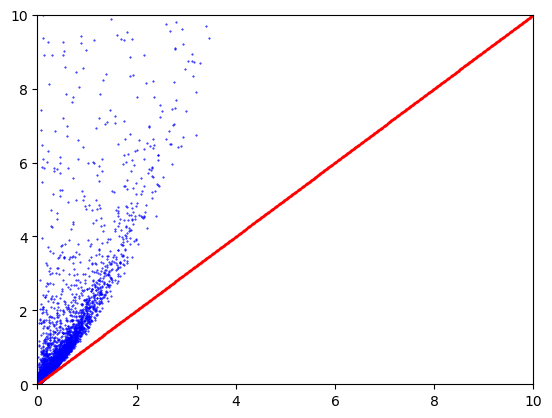

In [7]:
# graph of mean and variance of matrix (col)
show_mean_var(X)

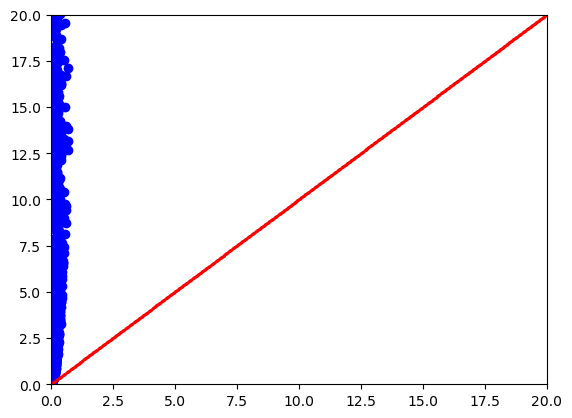

In [8]:
# graph of mean and variance of matrix (row)
cmean=[]
cvar=[]
plt.figure()
for i in range(len(X)):
    cmean.append(np.average(X[i]))
    cvar.append(np.var(X[i]))
plt.scatter(cmean,cvar,c='b')
plt.xlim(0,20)
plt.ylim(0,20)
lx=np.linspace(0, 20,1000)
ly=lx
plt.scatter(lx, ly, s=0.5,c='r')
lx=np.linspace(0, 20,1000)
ly=lx
plt.scatter(lx, ly, s=0.5,c='r')
plt.show()


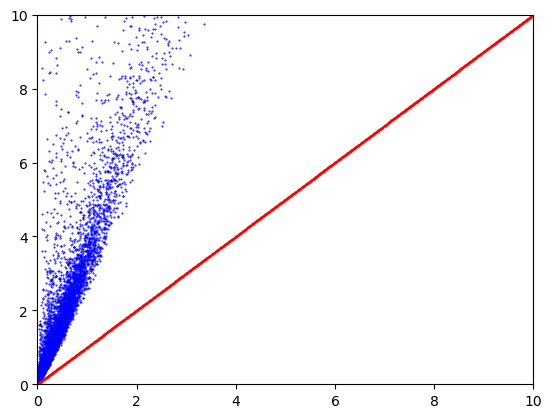

In [9]:
#graph of cp10k data (mean & variance)
Y=read_mat('cp10k')
show_mean_var(Y)

[15 14 14 ... 15 25 11]
(300, 10000)


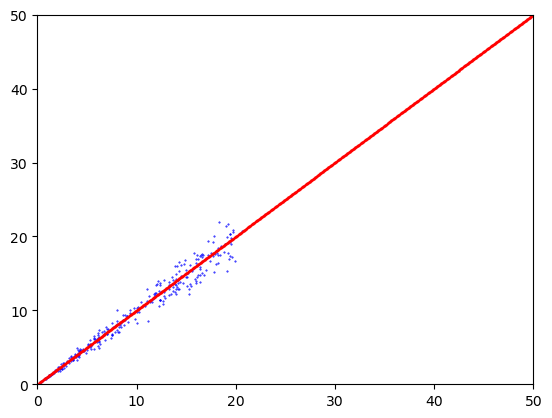

In [11]:
#generate a poisson distribution matrix to explore its similarity with scRNA data
def rand_poi(m,size):
    return np.random.poisson(m, size)
#set a 300*10000 matrix
X=np.zeros([300,10000])
m=np.random.random(10000)*20
print(rand_poi(m[0],10000))
for i in range(300):
    X[:,i]=(rand_poi(m[i],300))
X=np.array(X)
print(X.shape)
show_mean_var(X,xlim=50)



In [12]:
def randomize_zeros(arr):
    """
    Randomly set approximately one-third of the elements in the input array to zero.
    
    Parameters:
    - arr (np.array): The numpy array to be modified.
    
    Returns:
    - None: The function modifies the array in-place.
    """
    # Calculate the total number of elements in the array
    total_elements = arr.size
    
    # Calculate the number of elements to set to zero
    num_zeros = total_elements // 6
    
    # Generate random indices to set to zero
    indices = np.random.choice(total_elements, num_zeros, replace=False)
    
    # Set the selected indices to zero
    np.put(arr, indices, 0)

[12 12 10 ... 10  7 16]
(300, 10000)


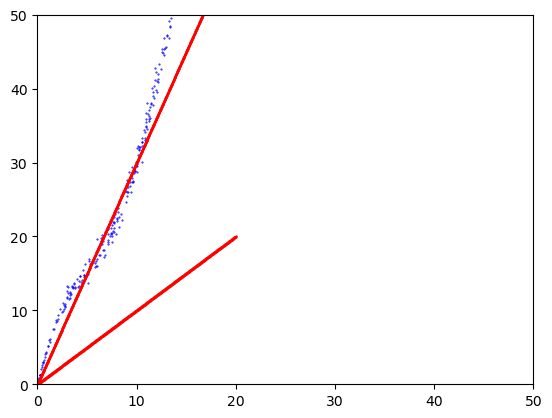

In [13]:
#generate a poisson distribution matrix with extra zeros caused by detecting threshold to explore its similarity with scRNA data
#ZIP distribution
def rand_poi_withzero(m,size):
    a=np.random.poisson(m, size)
    for i in range(len(a)):
        #set the detecting threshold (if amount<8, we can't detect them)
        if(a[i]<5):
            a[i]=0
        else:
            continue
        #set 1/3 data to 0 to simulate the condition that we don't have enough
    randomize_zeros(a)
    return a
#set a 300*10000 matrix
X=np.zeros([300,10000])
m=np.random.random(10000)*20
print(rand_poi(m[0],10000))
for i in range(300):
    X[:,i]=(rand_poi_withzero(m[i],300))
X=np.array(X)
print(X.shape)
lmean=[]
lvar=[]
plt.figure()
for i in range(len(X[0])):
    lmean.append(np.average(X[:,i]))
    lvar.append(np.var(X[:,i]))
#plot the mean & variance for standard poisson distribution
plt.scatter(lmean, lvar, s=0.2,c='b')
plt.xlim(0,50)
plt.ylim(0,50)
lx=np.linspace(0, 20,1000)
ly=lx
lz=3*lx
plt.scatter(lx, lz, s=0.5,c='r')
plt.scatter(lx, ly, s=0.5,c='r')
plt.show()


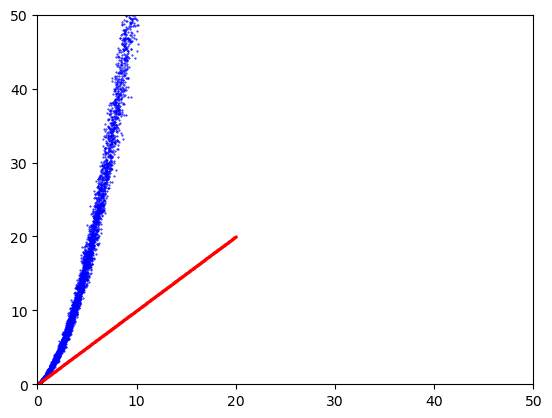

In [17]:
import numpy as np
# 10000 * 300 matrix (300 cells & 10000 genes)
a=[]
# generate NB distribution
for i in range(10000):
    # for a kind of gene, the probability will be same for cells
    f=[]
    p=np.random.random(1)[0]
    for ii in range(300):
        #set the random int amount of specific gene detected in a cell
        r=np.random.randint(1,10) 
        ff = np.random.negative_binomial(r, p, size=1)[0]
        f.append(ff)
    a.append(f)
#plot the mean & variance of our matrix
lmean=[]
lvar=[]
plt.figure()
for i in range(len(a)):
    lmean.append(np.average(a[i]))
    lvar.append(np.var(a[i]))
#plot the mean & variance for standard poisson distribution
plt.scatter(lmean, lvar, s=0.2,c='b')
plt.xlim(0,50)
plt.ylim(0,50)
lx=np.linspace(0, 20,1000)
ly=lx
plt.scatter(lx, ly, s=0.5,c='r')
plt.show()


In [18]:
X=read_mat('original')

In [19]:
X=np.array(X,dtype=int)
X.shape

(1937, 19093)

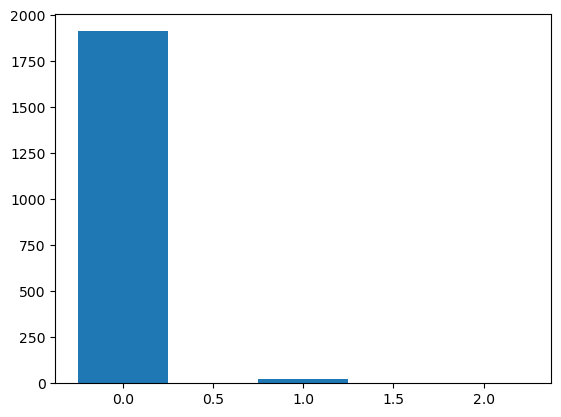

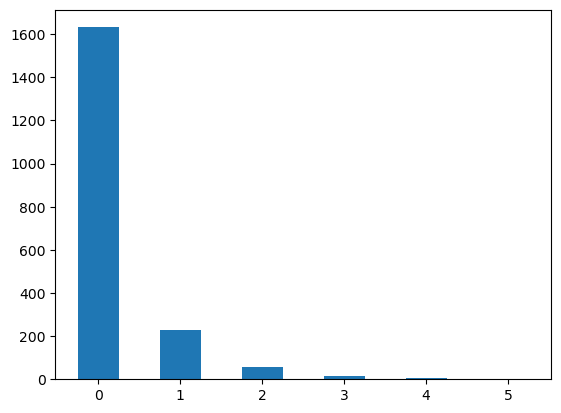

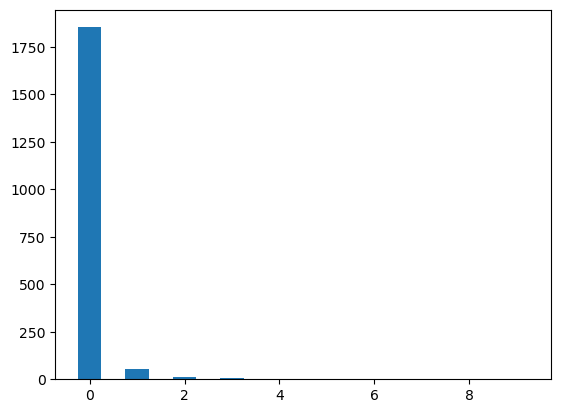

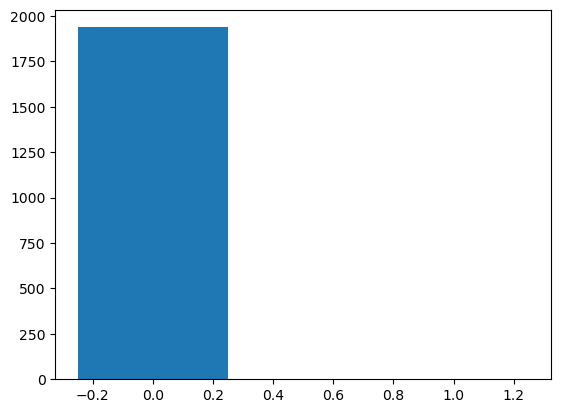

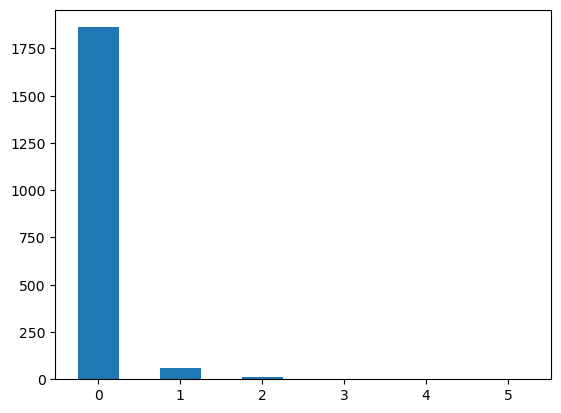

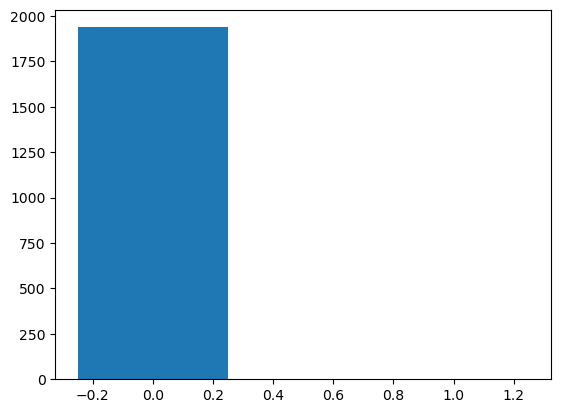

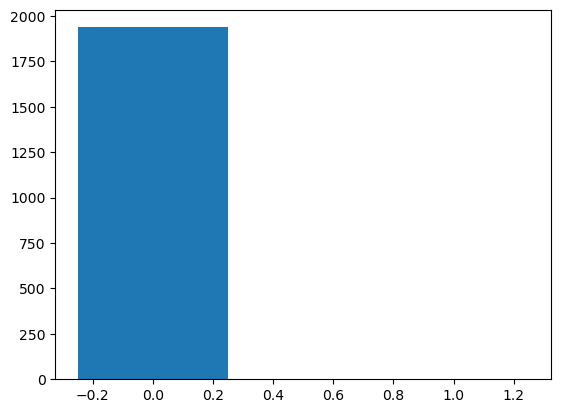

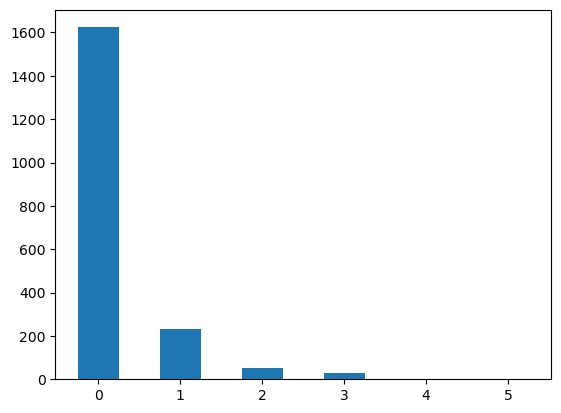

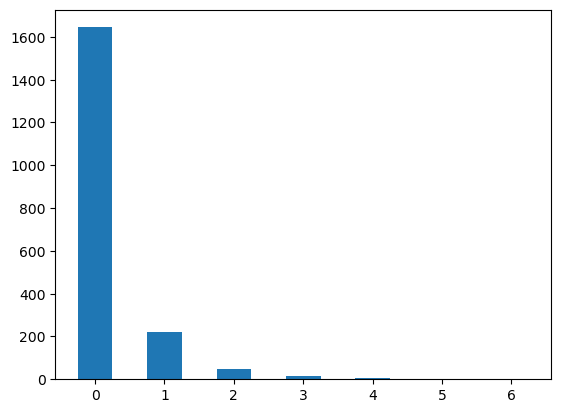

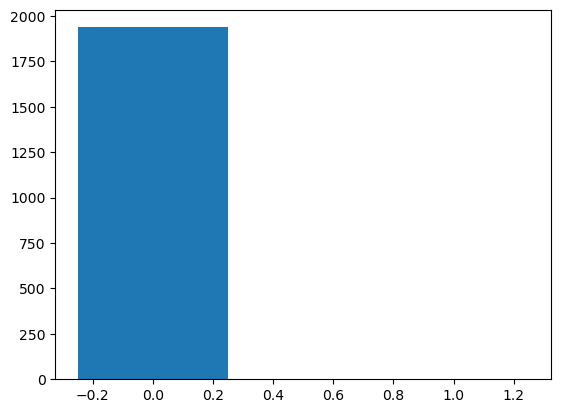

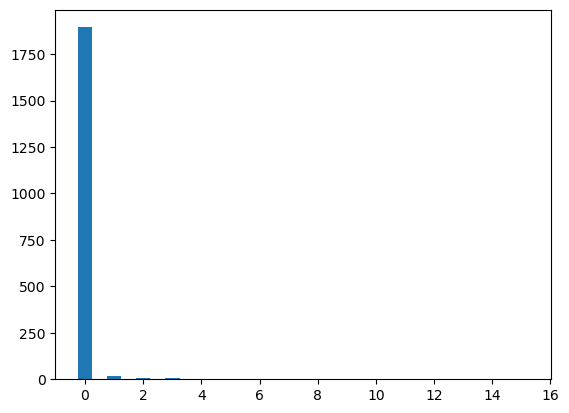

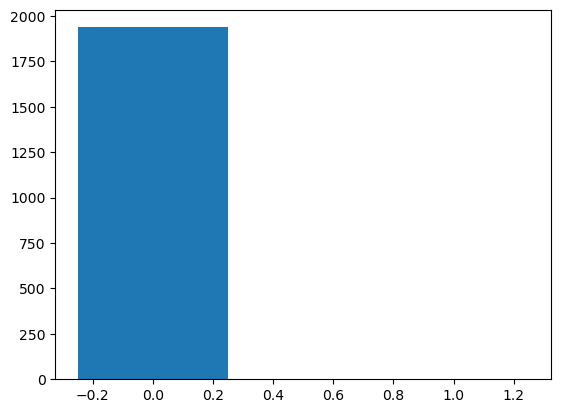

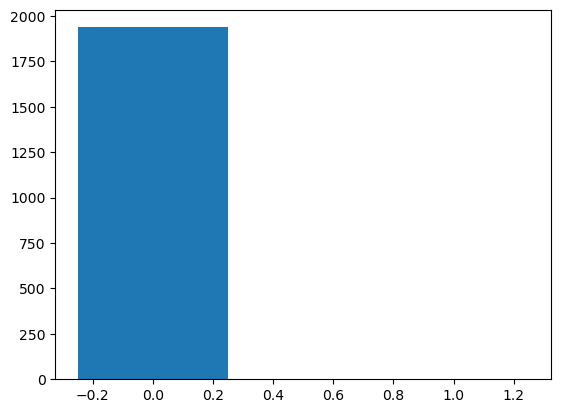

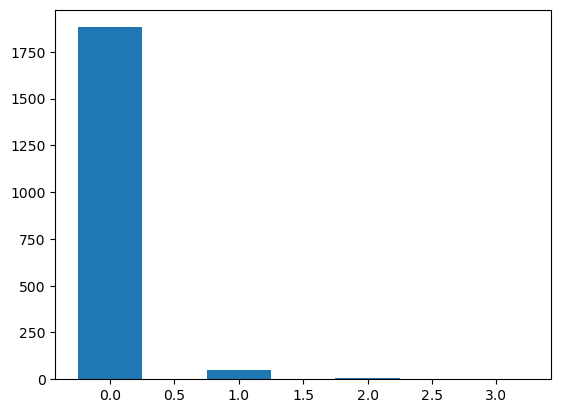

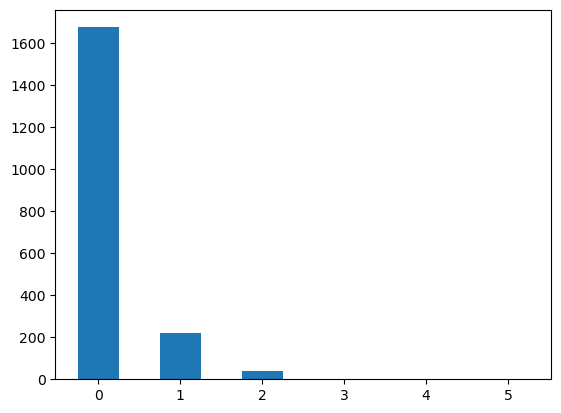

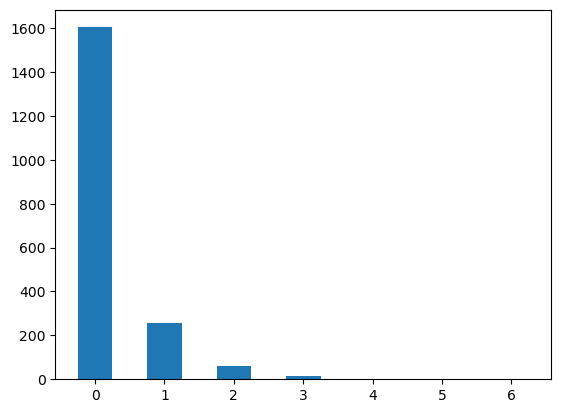

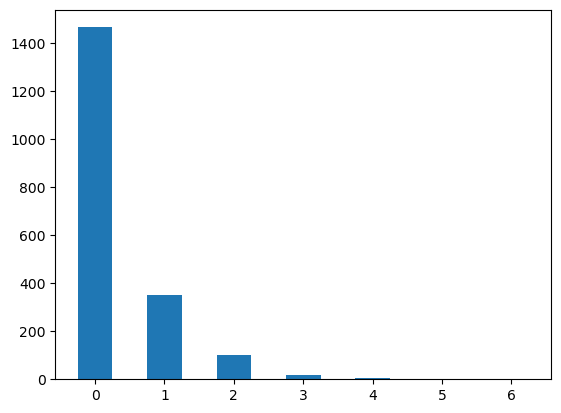

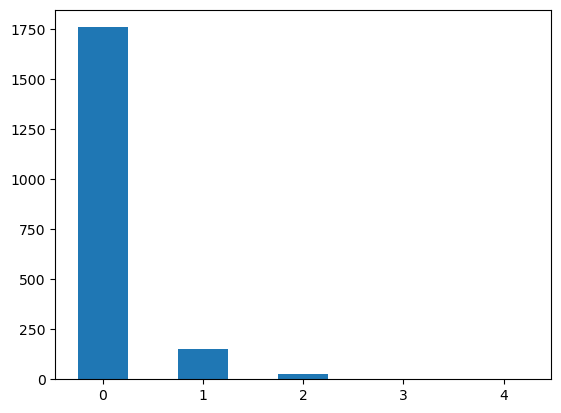

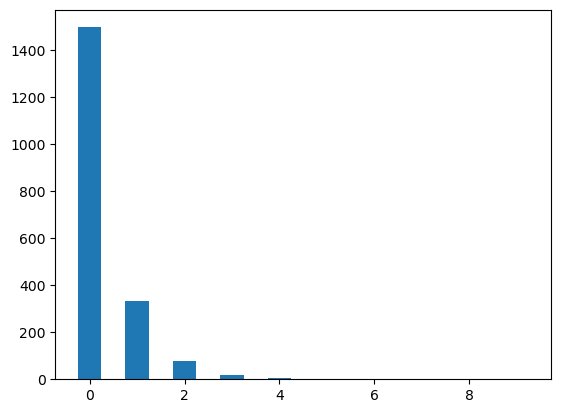

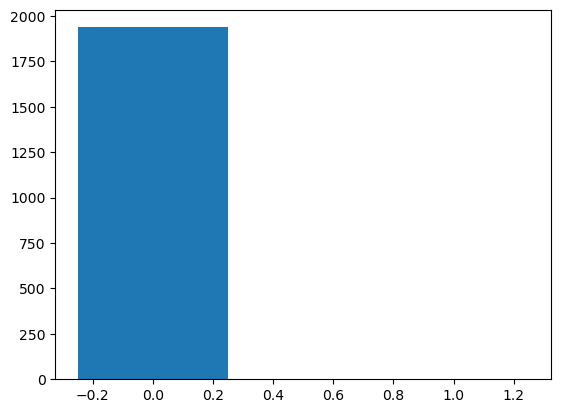

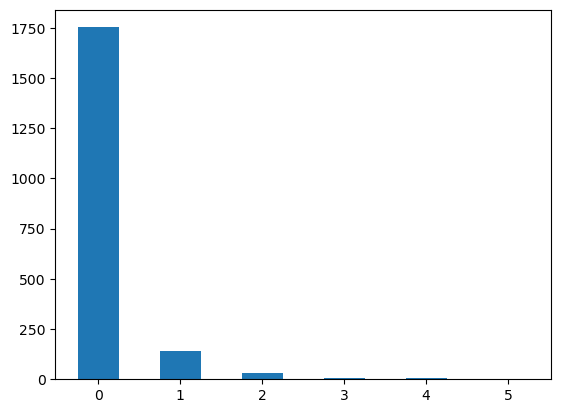

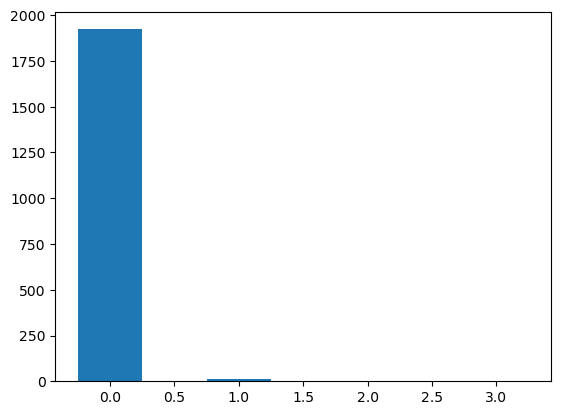

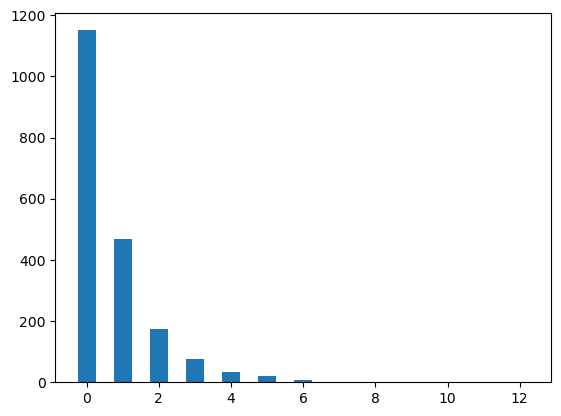

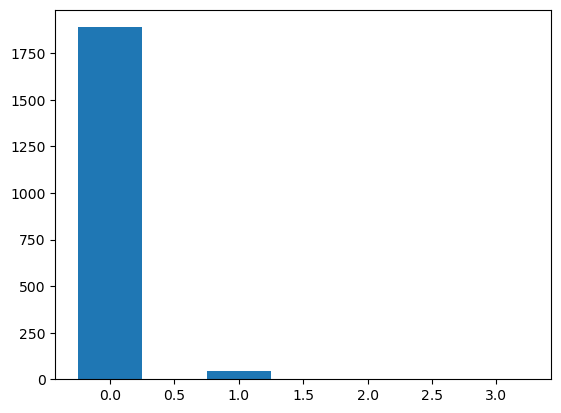

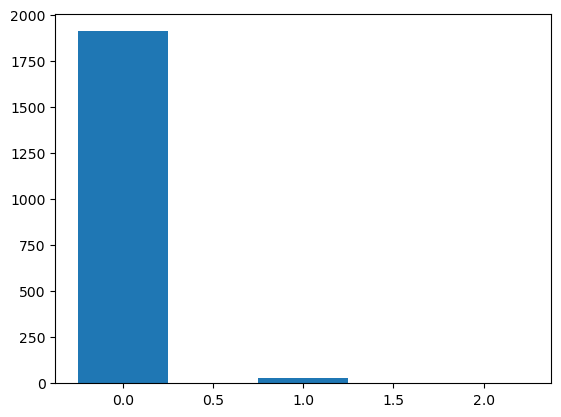

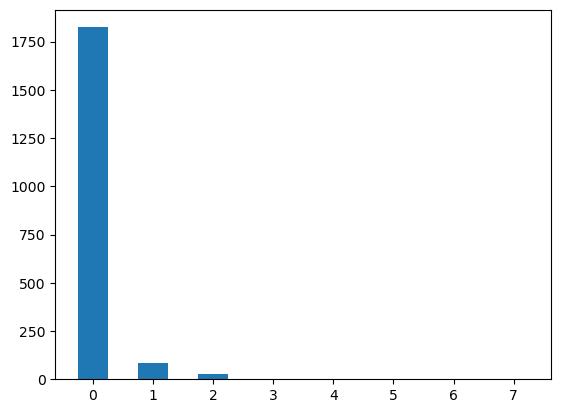

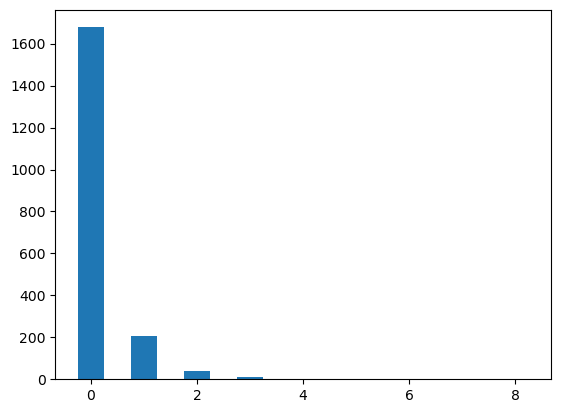

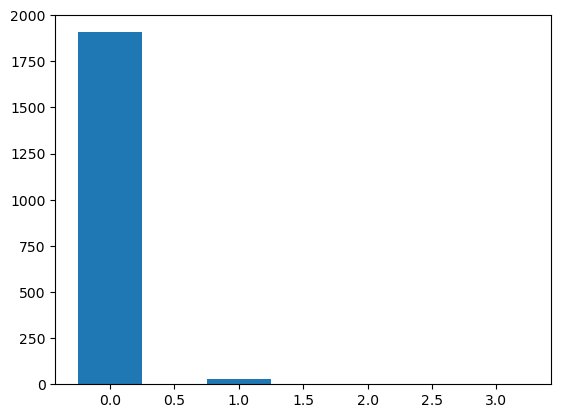

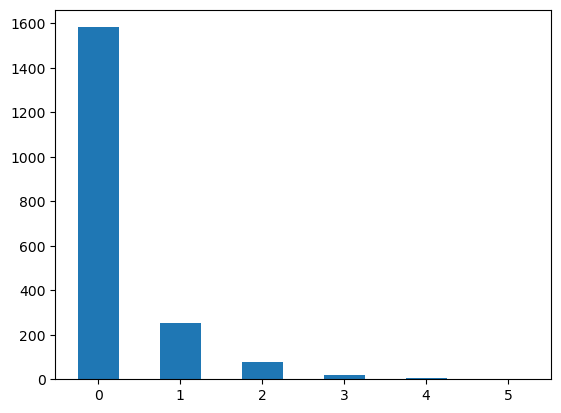

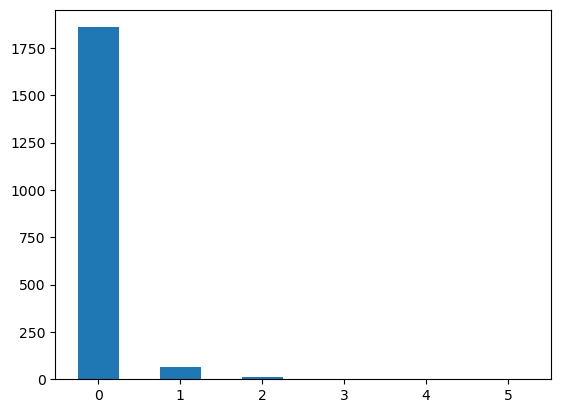

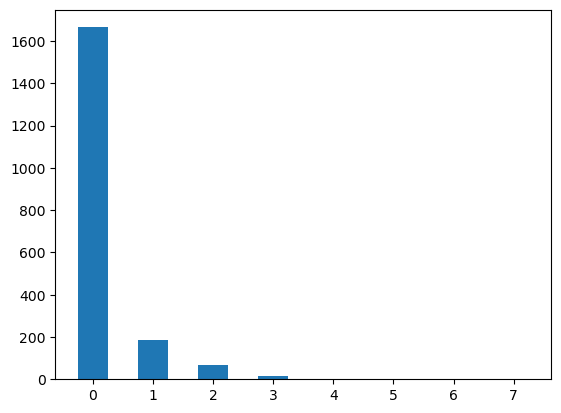

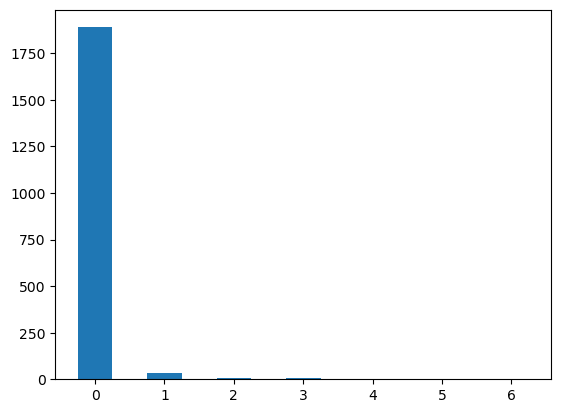

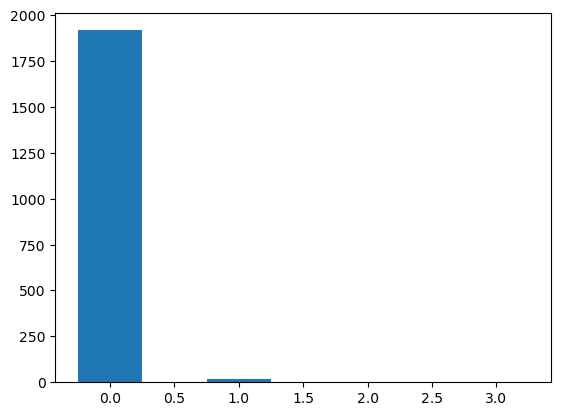

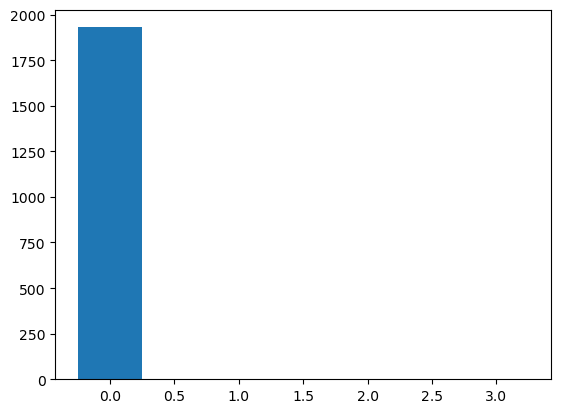

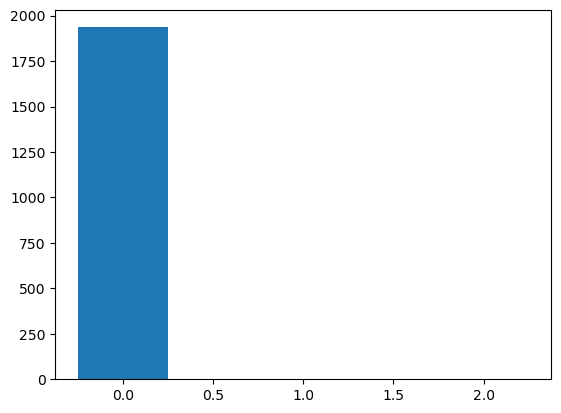

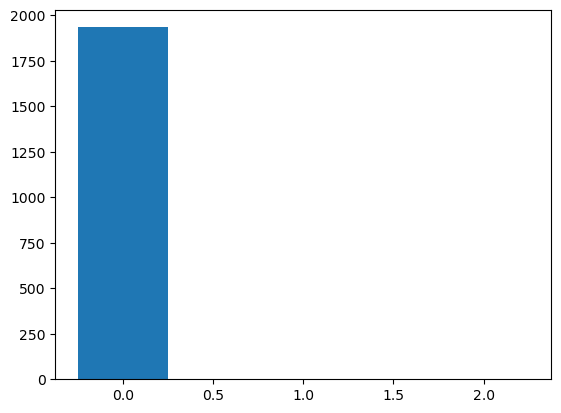

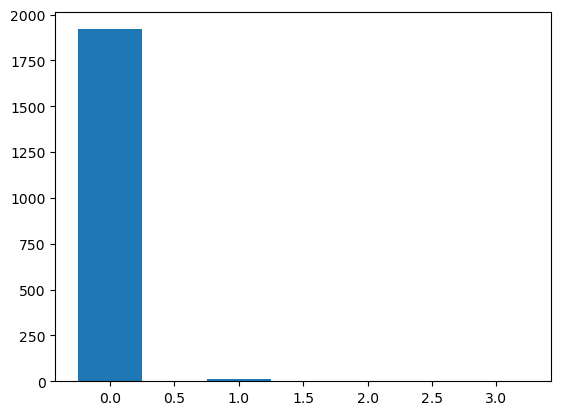

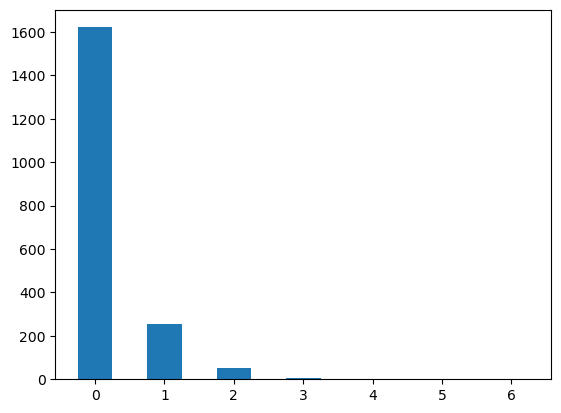

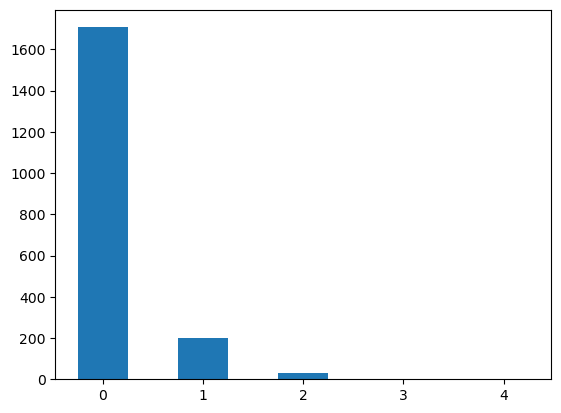

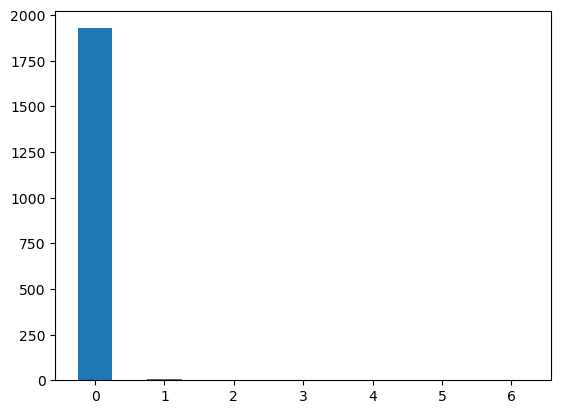

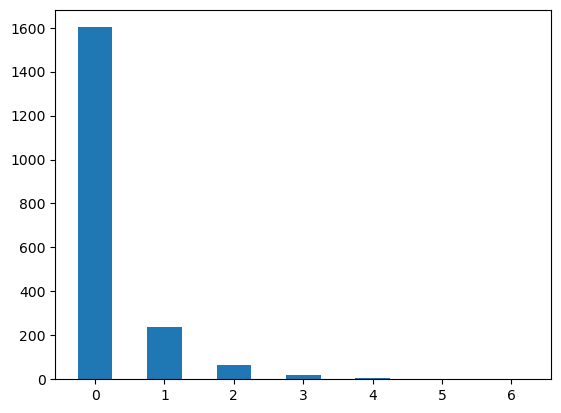

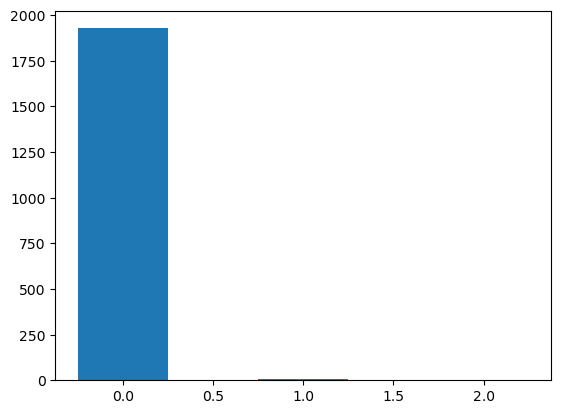

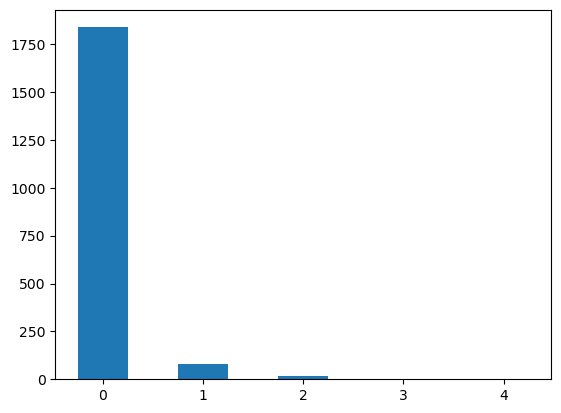

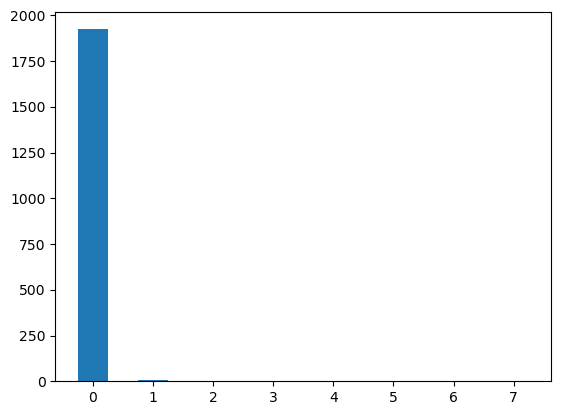

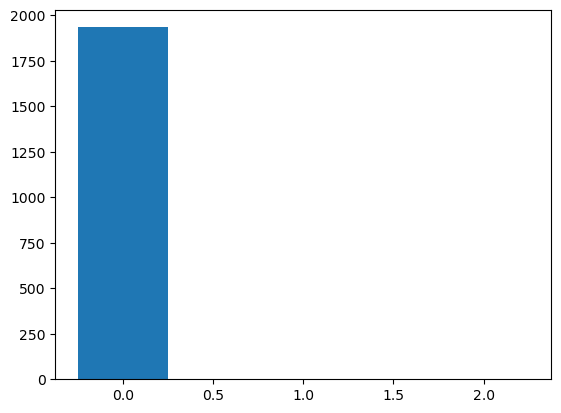

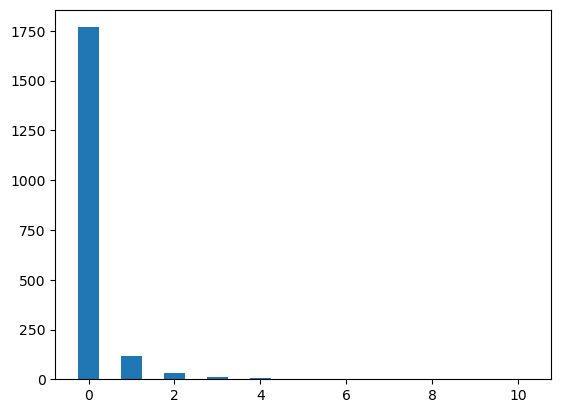

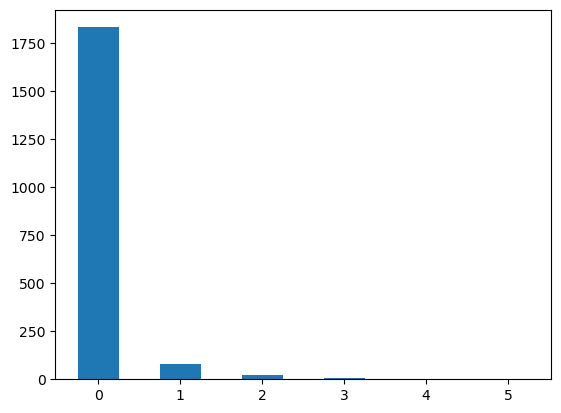

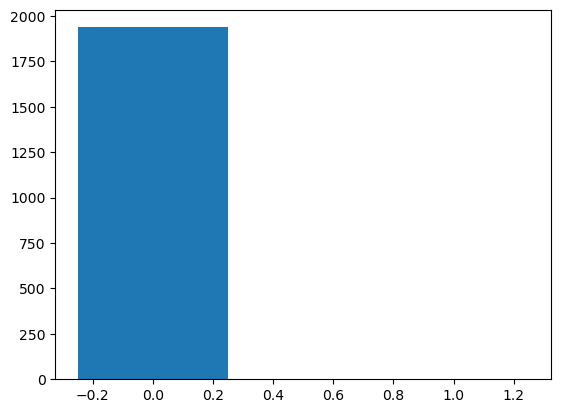

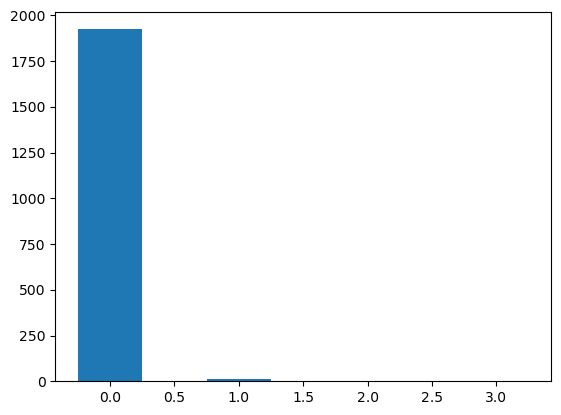

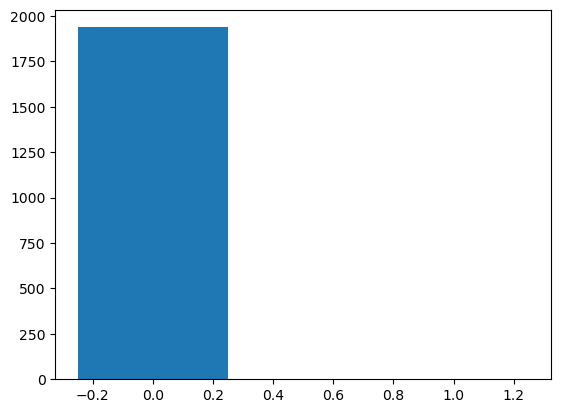

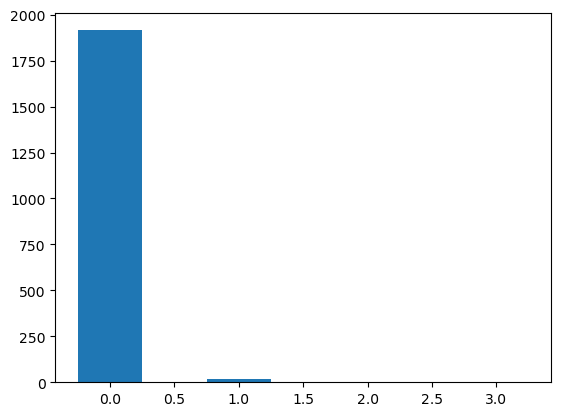

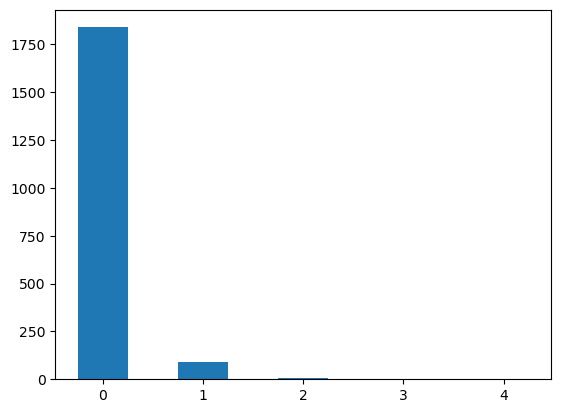

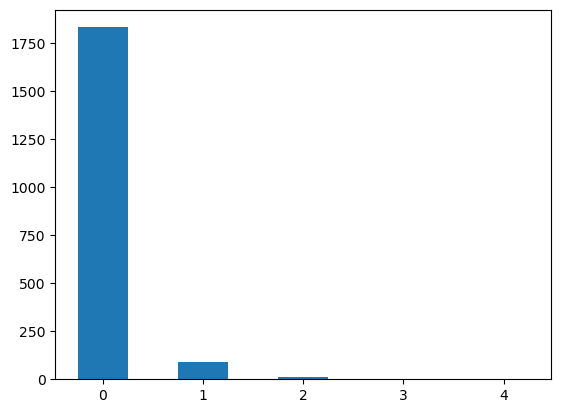

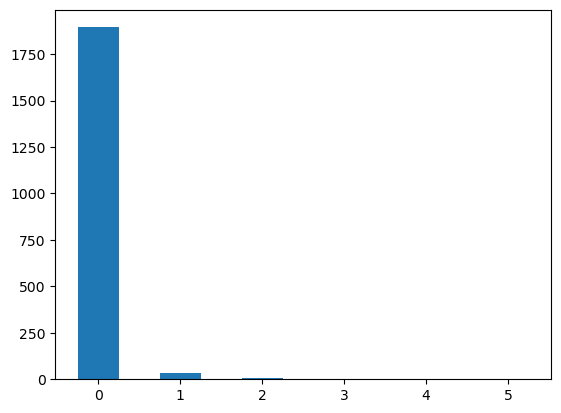

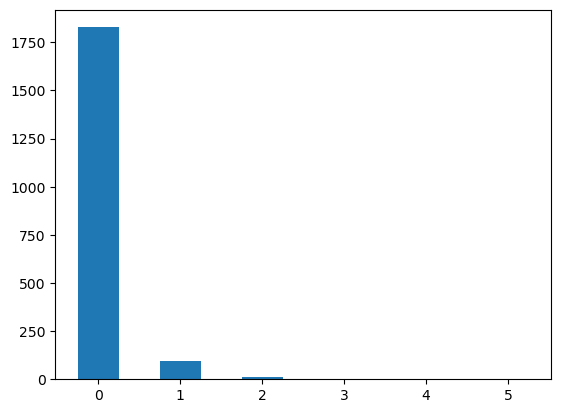

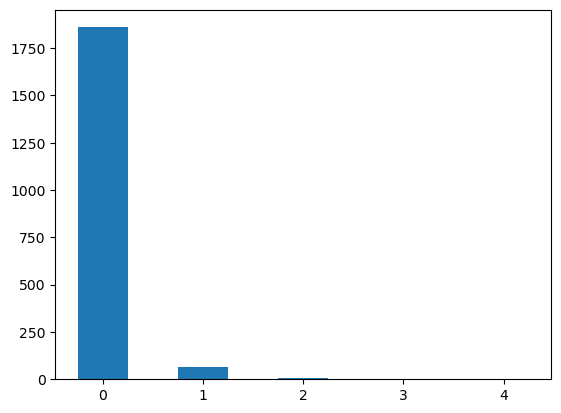

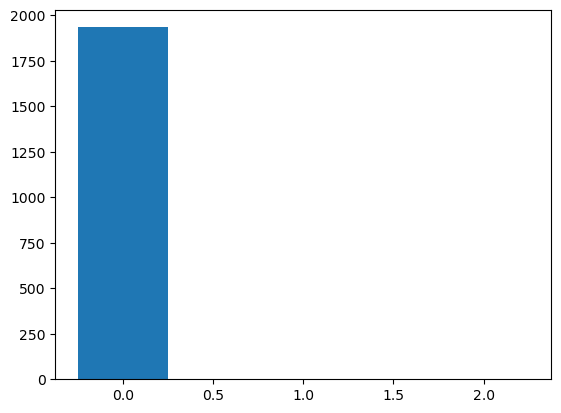

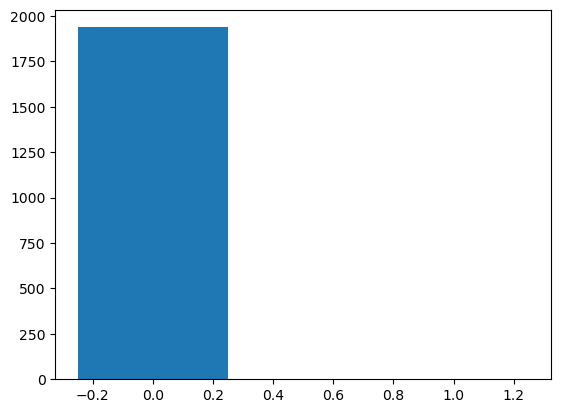

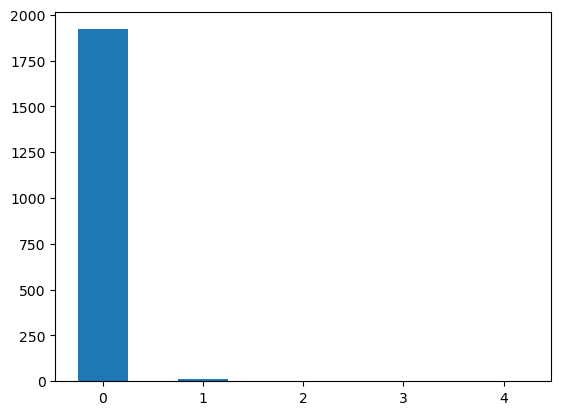

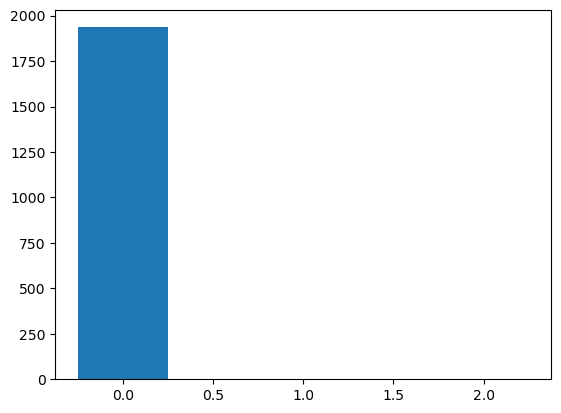

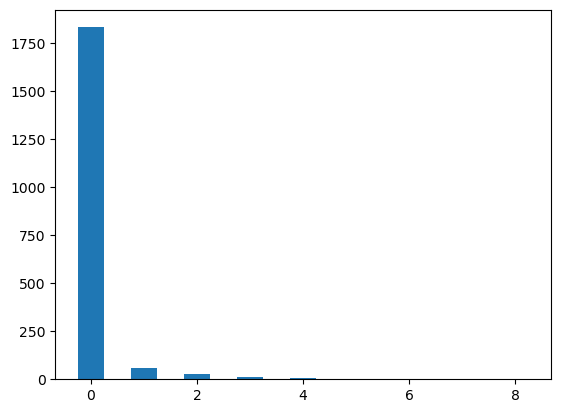

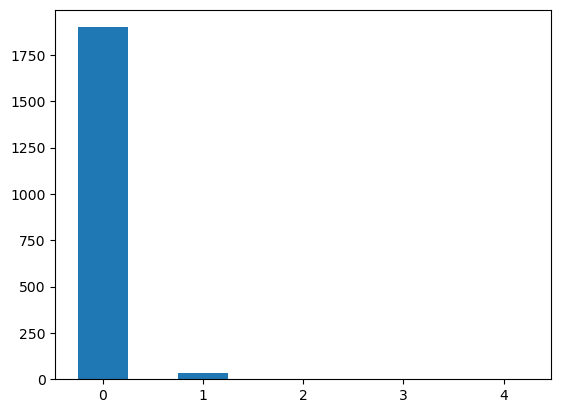

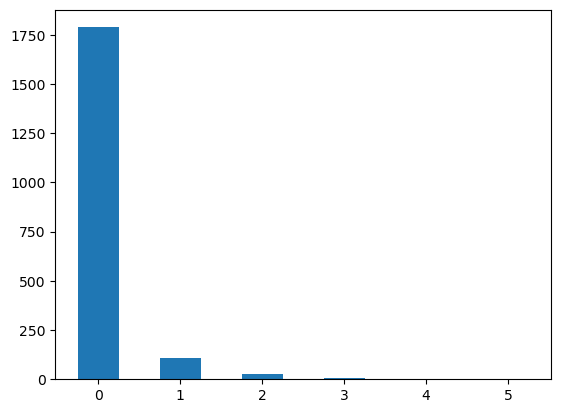

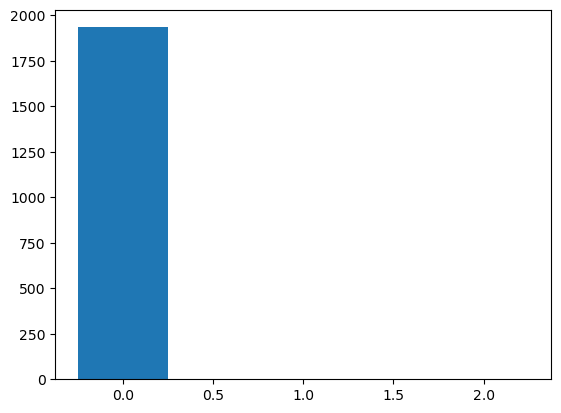

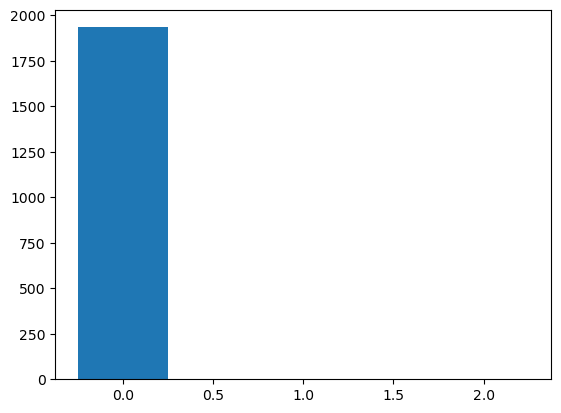

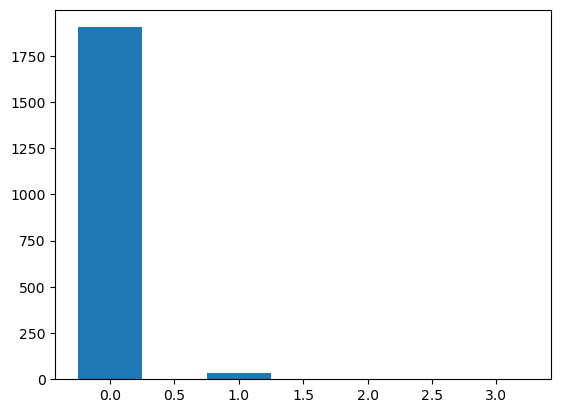

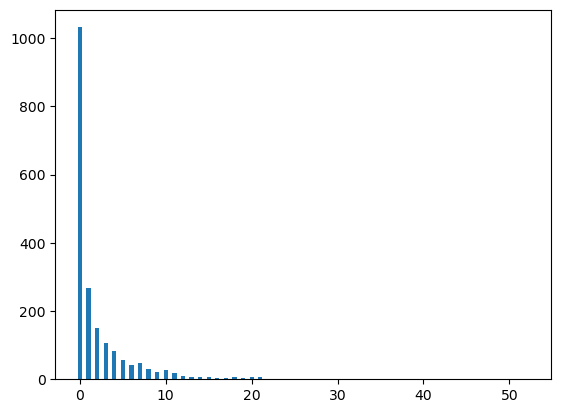

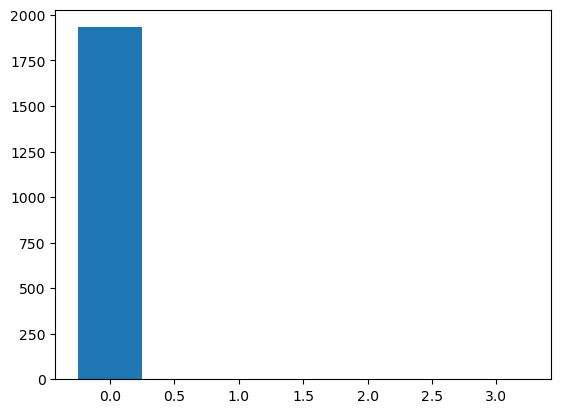

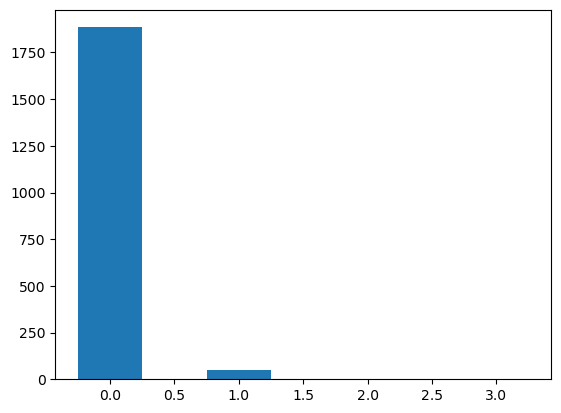

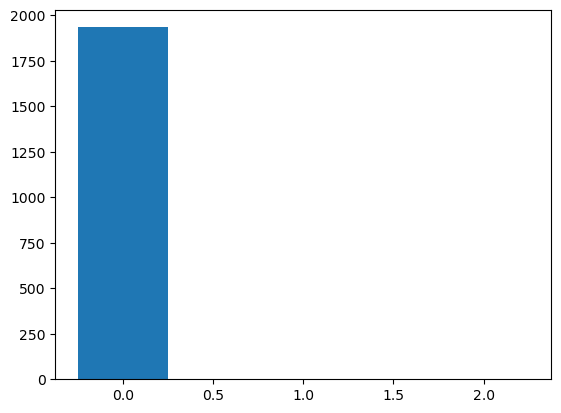

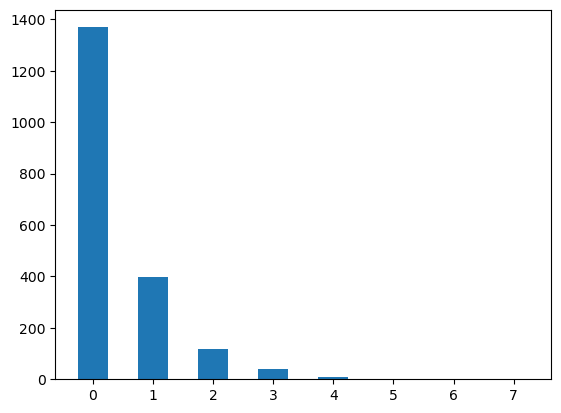

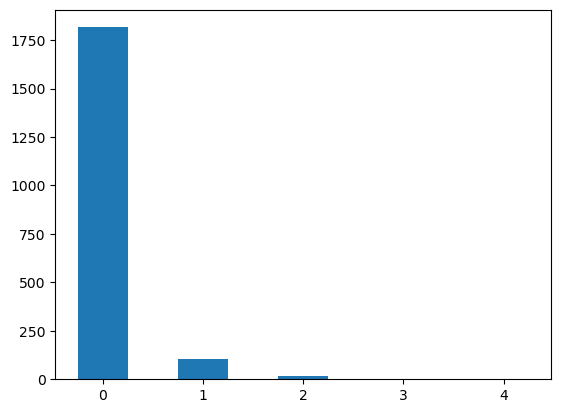

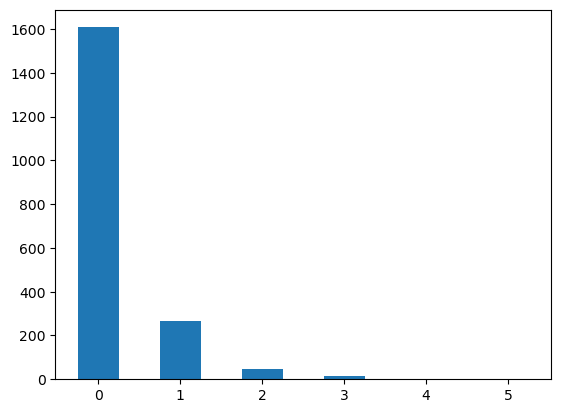

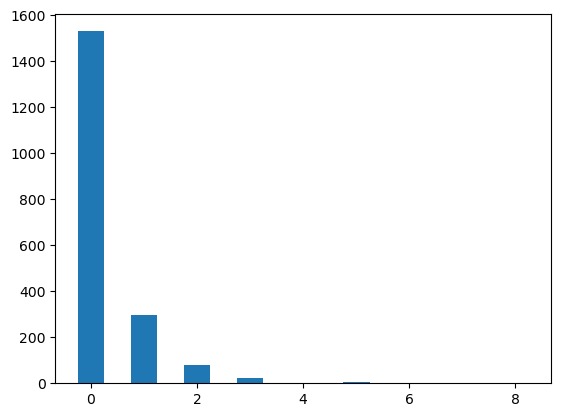

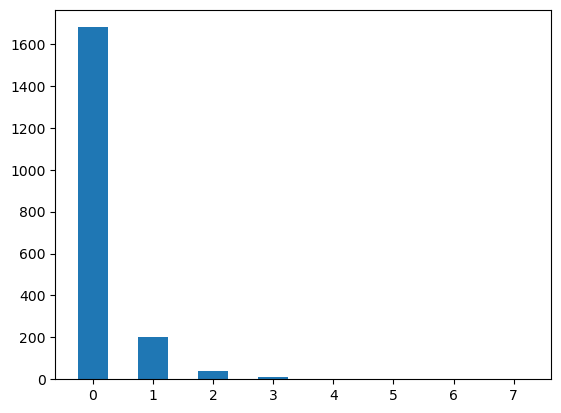

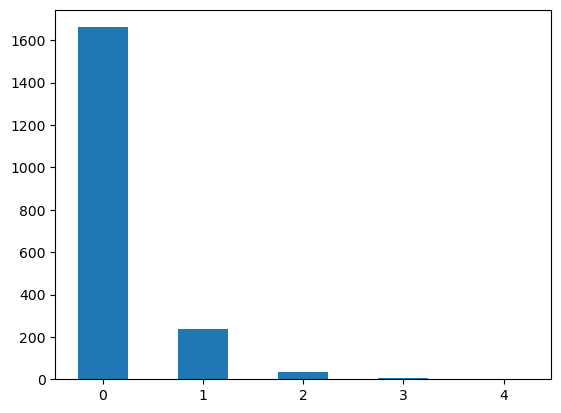

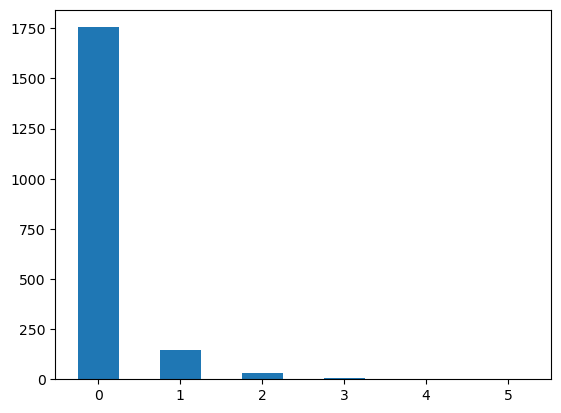

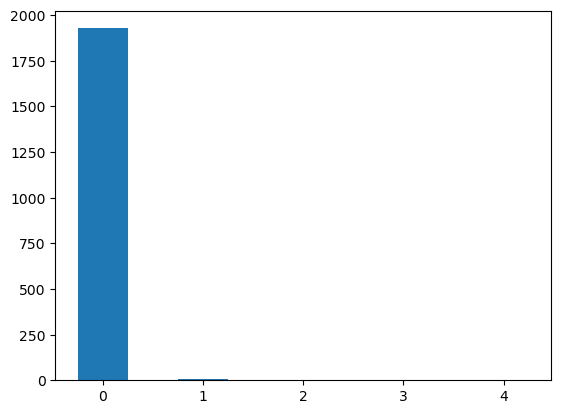

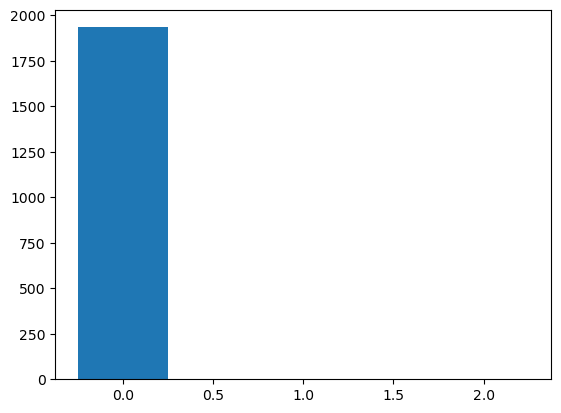

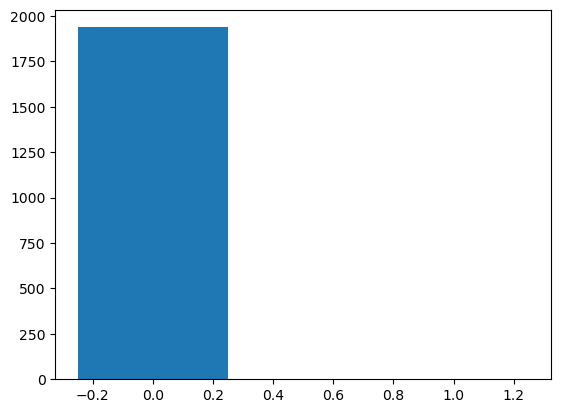

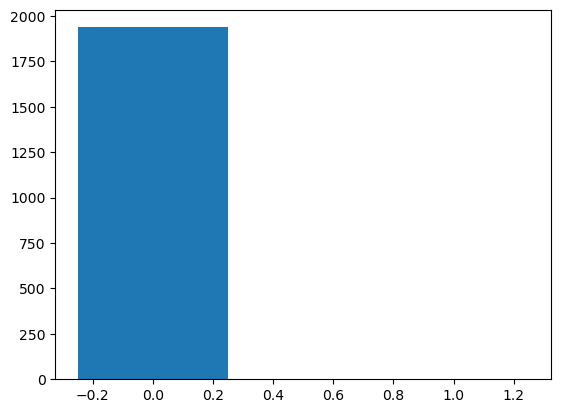

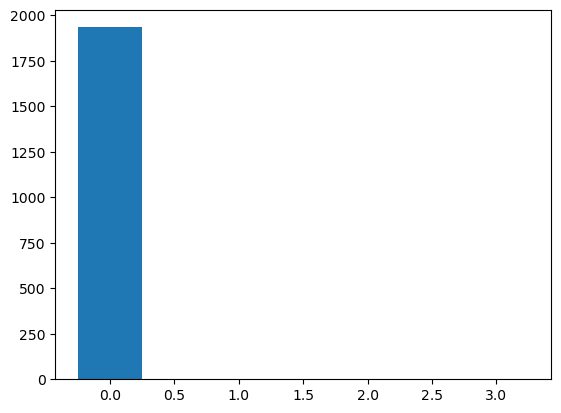

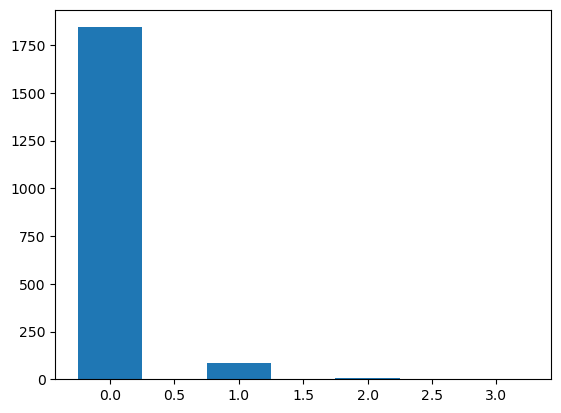

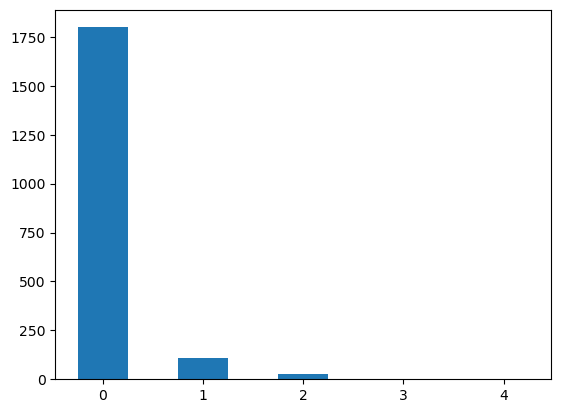

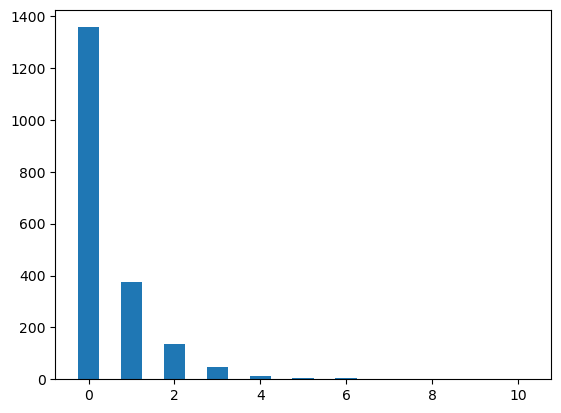

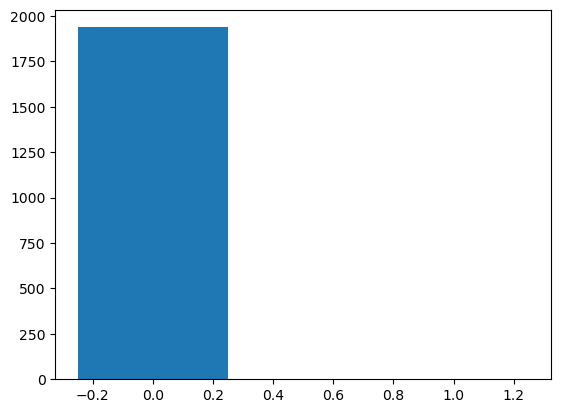

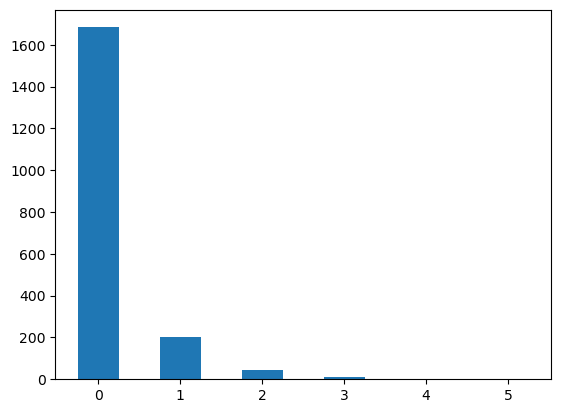

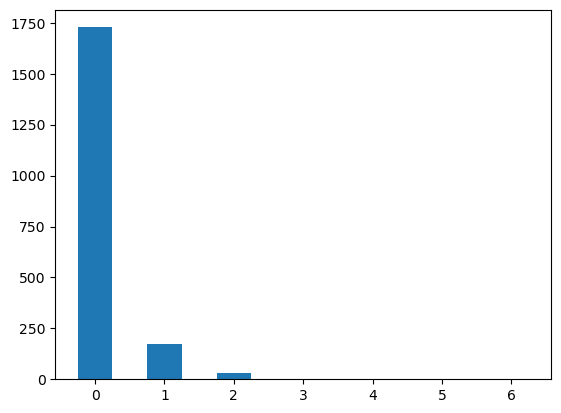

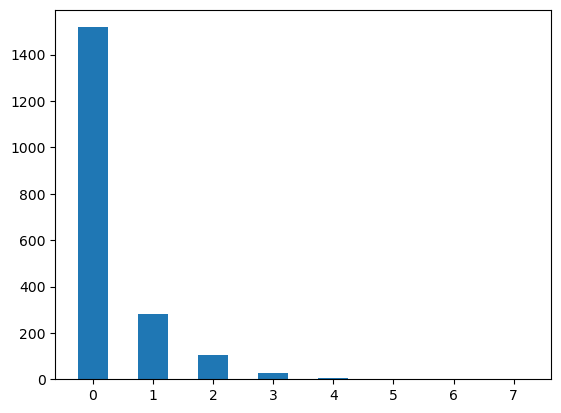

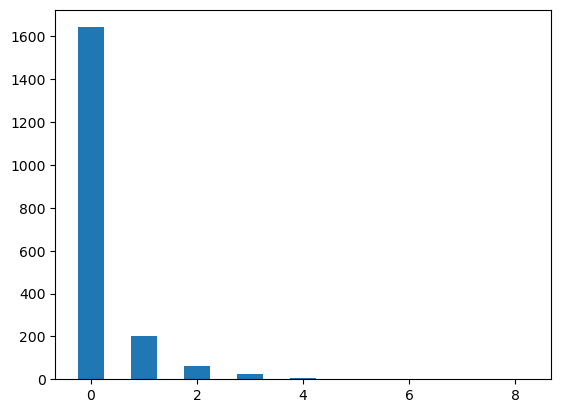

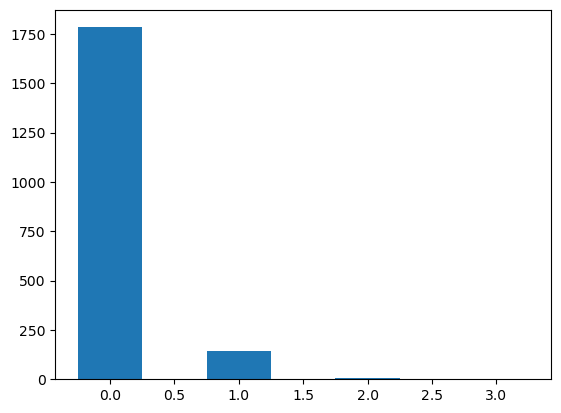

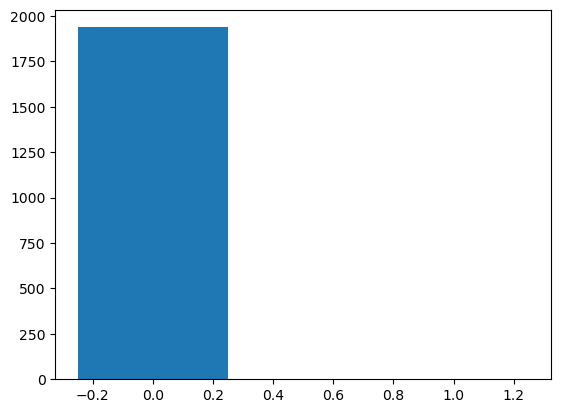

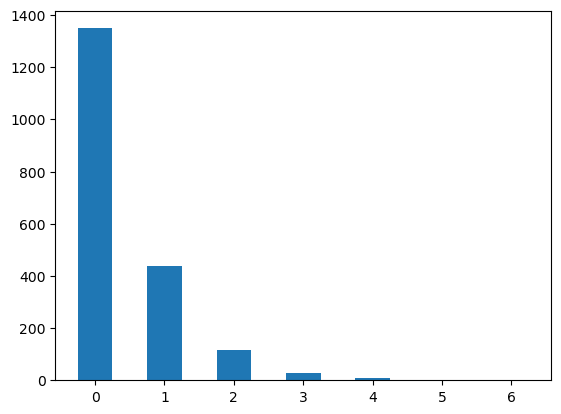

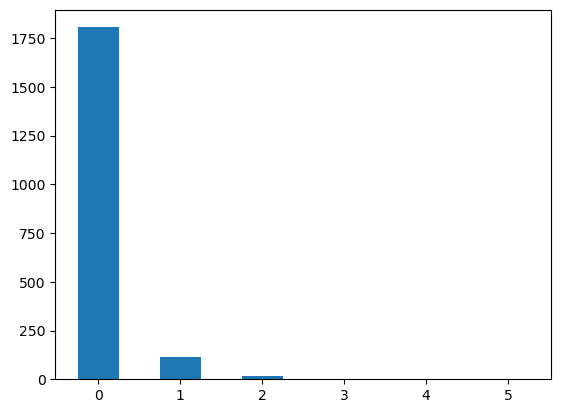

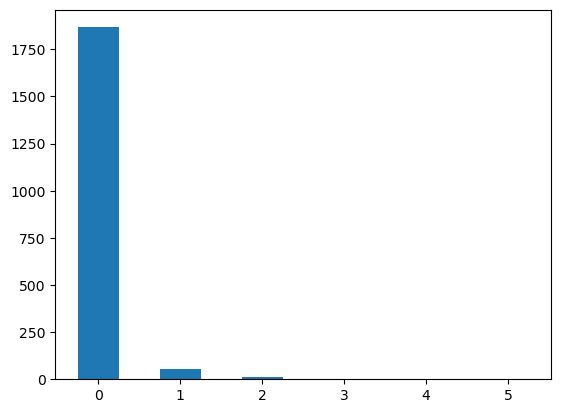

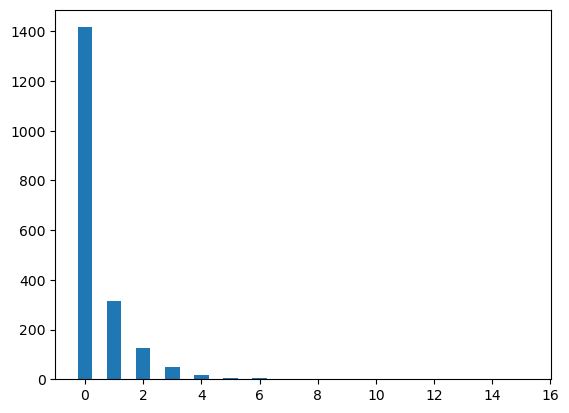

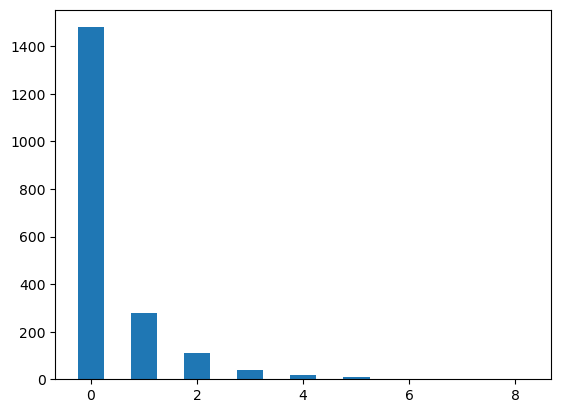

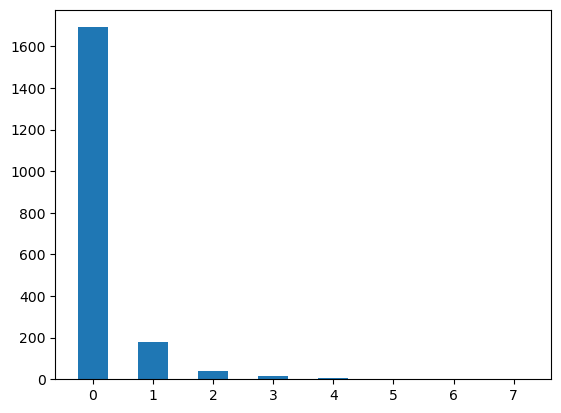

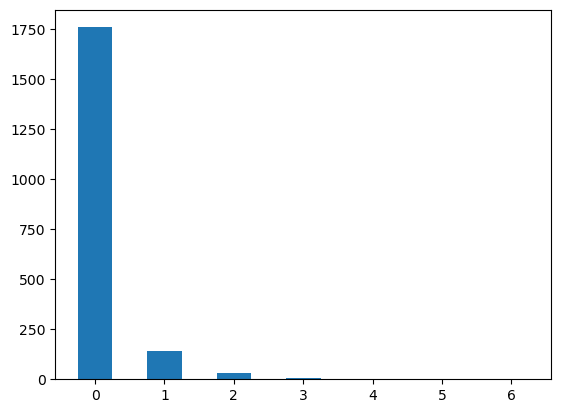

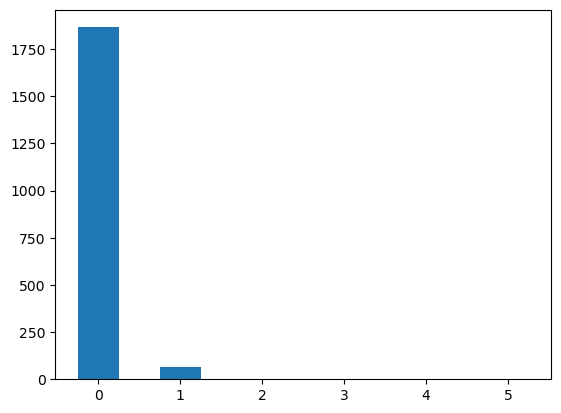

In [21]:
#some graphs for some gene distribution (top100)
for m in range(100):
    plt.figure()
    bins=np.zeros((np.max(X[:,m])+2)*2)
    for i in range(len(bins)):
        bins[i]=(i-0.5)/2
    a=plt.hist((X[:,m]),bins=bins)
    plt.show()

In [23]:
from tools_of_ZINB import *

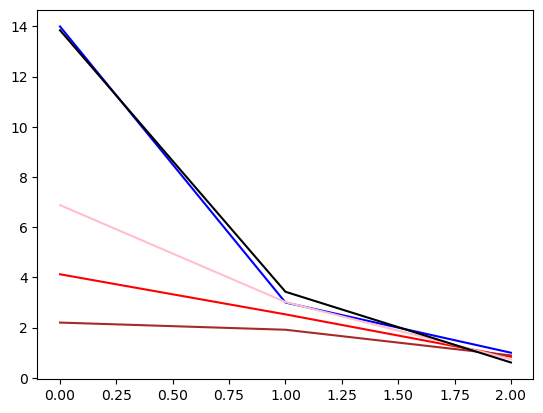

In [25]:
#An example of the ZINB distribution
l=[0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,0]
mu=np.mean(l)
sig=np.var(l)
a=get_zeroinflated(l)
plt.plot(classify(l),color='b')
r,p=calculate_nb_parameters(mu,sig,a)
lpr=[p**r,r*(1-p)*p**r,(r+1)*r/2*(1-p)**2*p**r]
lpr=np.array(lpr)
lpr*=(len(l)*(1-a))
plt.plot(lpr,color='r')
a=0.7
r,p=calculate_nb_parameters(mu,sig,a)
lpr=[p**r,r*(1-p)*p**r,(r+1)*r/2*(1-p)**2*p**r]
lpr=np.array(lpr)
lpr*=(len(l)*(1-a))
plt.plot(lpr,color='brown')
a=0.4
r,p=calculate_nb_parameters(mu,sig,a)
lpr=[p**r,r*(1-p)*p**r,(r+1)*r/2*(1-p)**2*p**r]
lpr=np.array(lpr)
lpr*=(len(l)*(1-a))
plt.plot(lpr,color='pink')
a=0
r,p=calculate_nb_parameters(mu,sig,a)
lpr=[p**r,r*(1-p)*p**r,(r+1)*r/2*(1-p)**2*p**r]
lpr=np.array(lpr)
lpr*=(len(l)*(1-a))
plt.plot(lpr,color='black')

(array([5398.,    0.,    0.,    0.,    0., 6087., 1833., 1812., 1479.,
        2484.]),
 array([-1.  , -0.82, -0.64, -0.46, -0.28, -0.1 ,  0.08,  0.26,  0.44,
         0.62,  0.8 ]),
 <BarContainer object of 10 artists>)

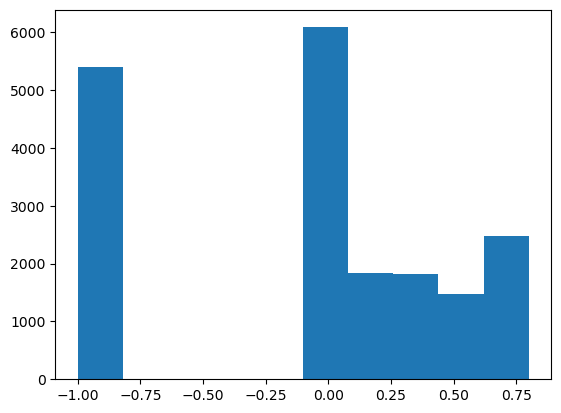

In [27]:
#Show the zero_inflation rate (in total)
infla=np.loadtxt('zero_inflation_rate.txt')

for i in range(len(infla)):
    infla[i]=int(infla[i]*5)/5
len(infla),len(infla[infla!=-1])
plt.hist(infla)

(array([788., 704., 801., 685., 797., 640., 814., 805., 699., 875.]),
 array([1.0000e+00, 1.9100e+03, 3.8190e+03, 5.7280e+03, 7.6370e+03,
        9.5460e+03, 1.1455e+04, 1.3364e+04, 1.5273e+04, 1.7182e+04,
        1.9091e+04]),
 <BarContainer object of 10 artists>)

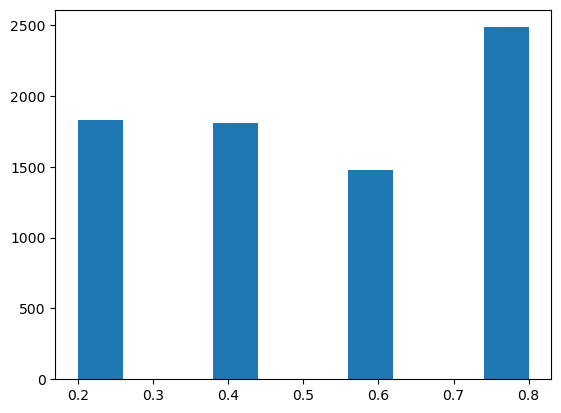

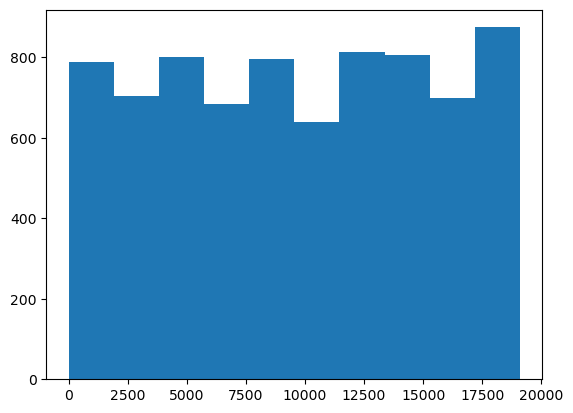

In [28]:
#Show the zero_inflation rate (obly the value>0)
idx_nonzero=[]
idx=[]
for i in range(len(infla)):
    if infla[i]==0:
        idx.append(i)
    if(infla[i]!=0 and infla[i]!=-1):
        idx_nonzero.append(i)
idx,idx_nonzero
l=[]
l2=[]
for i in range(len(idx_nonzero)):
    m=idx_nonzero[i]
    l.append(infla[m])
for i in range(len(idx)):
    n=idx[i]
    l2.append(infla[n])
plt.figure()
plt.hist(l)
plt.figure()
plt.hist(idx_nonzero)

0.6

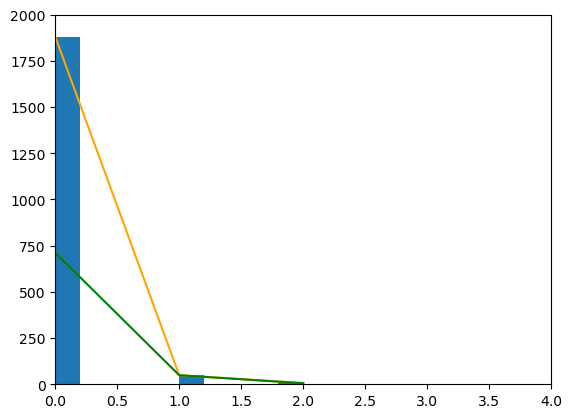

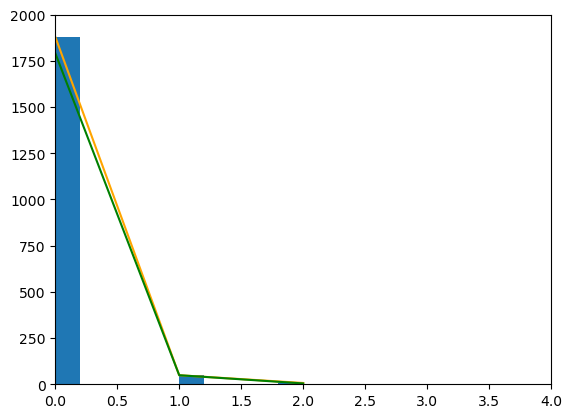

In [29]:
#Using Gene13 as the example of ZINB distrbution exsitence 
mu=np.mean(X[:,13])
sig=np.var(X[:,13])
a=infla[13]
r,p=calculate_nb_parameters(mu,sig,a)
p0=p**r
p1=r*(1-p)*p**r
p2=(r+1)*r/2*(1-p)**2*p**r
plt.xlim(0,4)
plt.ylim(0,2000)
plt.hist(X[:,13])
plt.plot(classify(X[:,13]),color='orange')
cl=classify(X[:,13])[1]
nn=[cl/p1*p0,cl,cl/p1*p2]
plt.plot(nn,color='green')
plt.figure()
a=0
r,p=calculate_nb_parameters(mu,sig,a)
p0=p**r
p1=r*(1-p)*p**r
p2=(r+1)*r/2*(1-p)**2*p**r
plt.xlim(0,4)
plt.ylim(0,2000)
plt.hist(X[:,13])
plt.plot(classify(X[:,13]),color='orange')
cl=classify(X[:,13])[1]
nn=[cl/p1*p0,cl,cl/p1*p2]
plt.plot(nn,color='green')
infla[13]

[[[ 1  2 54 ...  3  3  8]]

 [[ 0  1 37 ...  2 10 31]]

 [[ 0  0 18 ...  0  4  9]]

 ...

 [[ 0  2  4 ...  0  0  0]]

 [[ 1  2  0 ...  0  0  0]]

 [[ 0  0  3 ...  1  0  1]]]
(1937, 765)


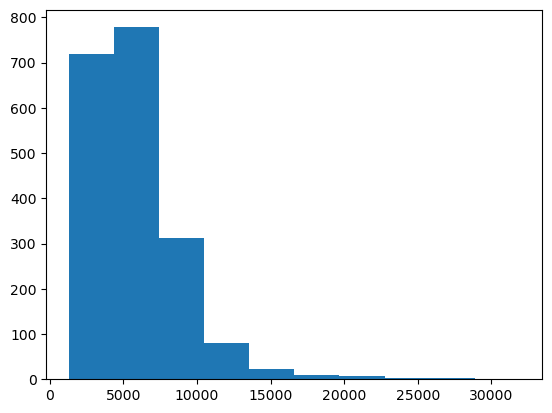

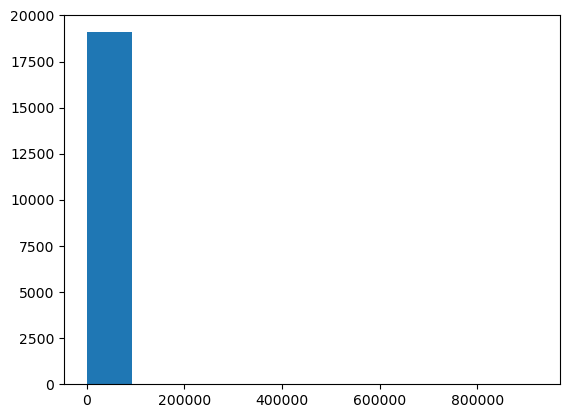

In [32]:
#Select gene expression more than 1936 (cell amount)
cellsum=[]
genesum=[]
a=np.max(X)
for i in range(len(X)):
    cellsum.append(np.sum(X[i]))
for i in range(len(X[0])):
    genesum.append(np.sum(X[:,i]))
plt.hist(cellsum)
plt.figure()
plt.hist(genesum)
genesum=np.array(genesum)
much_gene=np.sort(genesum)[int(0.96*len(genesum)):]
much_geneidx=np.where(genesum>1936)
much_geneidx
X2=X[:,much_geneidx]
print(X2)
X2=X2.flatten()
X2=X2.reshape([1937,765])
print(X2.shape)
np.savetxt('inDrop1_HEG.txt',X2)

In [35]:
def inscale(l,amount):
    s=[]
    l=np.array(l)
    l*=amount
    for i in range(len(l)):
        for j in range(int(l[i])):
            s.append(i)
    return s
inscale([0,0.5,0.5],10)

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2]

13869

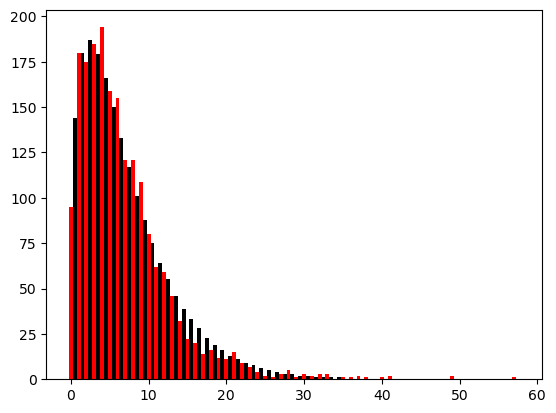

In [37]:
#Select a gene with high expression amount to show the NB & ZINB distribution probability
from scipy.stats import nbinom
def negative_binomial_probabilities(r, p, size):
    # 创建一个索引数组，从 0 到 size-1
    x = np.arange(size)
    # 计算每个索引的负二项分布概率
    probabilities = nbinom.pmf(x, r, p)
    return probabilities
def negative_binomial_parameters(mean, variance):
    if variance <= mean:
        raise ValueError("For a Negative Binomial Distribution, variance must be greater than mean.")
    
    p = mean / variance
    r = mean**2 / (variance - mean)
    
    return r, p

m=genesum.index(13145)
l=X[:,m]
bins=[-0.25]
for i in range(2*int(np.max(l)+1)):
    bins.append((0.5)+bins[-1])
bins
r,p=negative_binomial_parameters(np.mean(l),np.var(l))
plt.hist(l,bins=bins,color='red')
lnb=negative_binomial_probabilities(r,p,np.max(l)+1)
ba=np.array(inscale(lnb,len(l)))+0.5
plt.hist(ba,bins=bins,color='black')
m

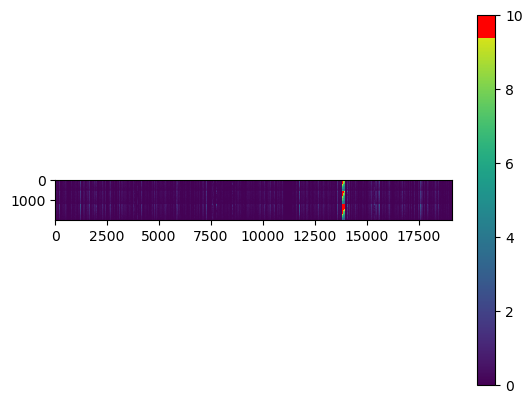

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
#Color gradient Graph of inDrop1 matrix
def create_colormap():
    cmap = plt.get_cmap('viridis')
    colors = [(cmap(i), cmap(i)) for i in range(cmap.N)]
    colors = [(cmap(i)) if i < cmap.N * 15 / 16 else (1, 0, 0, 1) for i in range(cmap.N)]
    
    new_cmap = mcolors.LinearSegmentedColormap.from_list('CustomCmap', colors, N=cmap.N)
    return new_cmap

def plot_gradient(array):

    cmap = create_colormap()

    norm = mcolors.Normalize(vmin=0, vmax=10)

    plt.imshow(array, cmap=cmap, norm=norm)
    plt.colorbar()
    plt.show()



plot_gradient(X)